In [1]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

# device config
device = torch.device('cude' if torch.cuda.is_available() else 'cpu')

#hyper parameters
input_size = 28 * 28
hidden_size = 100
num_classes = 10
num_epochs = 2
batch_size = 100
learning_rate = 0.001

In [7]:
#MNIST dataset
train_dataset = torchvision.datasets.MNIST(root='./data',train=True,transform=transforms.ToTensor(),download=True)
test_dataset = torchvision.datasets.MNIST(root='./data',train=False,transform=transforms.ToTensor())

train_loader = torch.utils.data.DataLoader(dataset=train_dataset,batch_size=batch_size,shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset,batch_size=batch_size,shuffle=False)

examples = iter(train_loader)
samples,labels = examples.next()
print(samples.shape, labels.shape)

torch.Size([100, 1, 28, 28]) torch.Size([100])


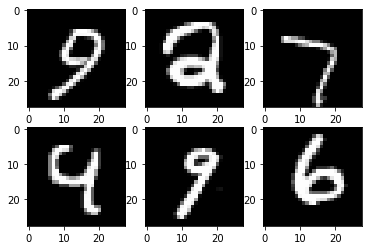

In [8]:
#Show samples
for i in range(6):
    plt.subplot(2,3,i+1)
    plt.imshow(samples[i][0],cmap='gray')

In [11]:
#Model
class NeuralNet(nn.Module):
    
    def __init__(self,input_size,hidden_size,num_classes):
        super(NeuralNet,self).__init__()
        self.l1 = nn.Linear(input_size,hidden_size)
        self.relu = nn.ReLU()
        self.l2 = nn.Linear(hidden_size,num_classes)
        #Notice no output layer if we intend to use CrossEntropyLoss() for training (to avoid redundancy)
    
    def  forward(self,x):
        out = self.l1(x)
        out = self.relu(out)
        out = self.l2(out)
        #No activation fn
        return out


model = NeuralNet(input_size,hidden_size,num_classes)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(),lr=learning_rate)

In [13]:
#Training
n_steps = len(train_loader)
for epoch in range(num_epochs):
    for i, (images,labels) in enumerate(train_loader):
        #Flatten image to 28 x 28 = 724 * 100
        images = images.reshape(-1,28*28).to(device)
        labels = labels.to(device)
        #forwad pass
        outputs = model(images)
        loss = criterion(outputs, labels)
        #backward pass
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if (i + 1) % 100 == 0:
            print(f'epoch: {epoch +1}/{num_epochs}\t step: {i+1}/{n_steps} \t loss:{loss.item():.4f}')
        

epoch: 1/2	 step: 100/600 	 loss:0.3991
epoch: 1/2	 step: 200/600 	 loss:0.3448
epoch: 1/2	 step: 300/600 	 loss:0.3134
epoch: 1/2	 step: 400/600 	 loss:0.1613
epoch: 1/2	 step: 500/600 	 loss:0.2079
epoch: 1/2	 step: 600/600 	 loss:0.1931
epoch: 2/2	 step: 100/600 	 loss:0.2081
epoch: 2/2	 step: 200/600 	 loss:0.2415
epoch: 2/2	 step: 300/600 	 loss:0.2335
epoch: 2/2	 step: 400/600 	 loss:0.1677
epoch: 2/2	 step: 500/600 	 loss:0.2885
epoch: 2/2	 step: 600/600 	 loss:0.1673


In [16]:
#test
with torch.no_grad():
    n_correct = 0
    n_samples = 0
    for images, labels in test_loader:
        #Flatten image to 28 x 28 = 724 * 100
        images = images.reshape(-1,28*28).to(device)
        labels = labels.to(device)
        outputs = model(images)
        
        #torch.max returns (index,value) for max element of 'outputs' tensor
        _,preds = torch.max(outputs,dim=1)
        n_samples += labels.shape[0]
        n_correct += (preds == labels).sum().item()
    acc = 100.0 * n_correct / n_samples
    print(f'Test acc: {acc:.4f}')

Test acc: 95.1900
